#*Proyecto analisis de señales parte I*

*1.Analisis*

Para la primera parte del proyecto de análisis de señales se solicita realizar un programa en Google Colaboratory que sea capaz de calcular parametros electricos de la red de baja tension de tipo industrial que se muestra a continuacion :

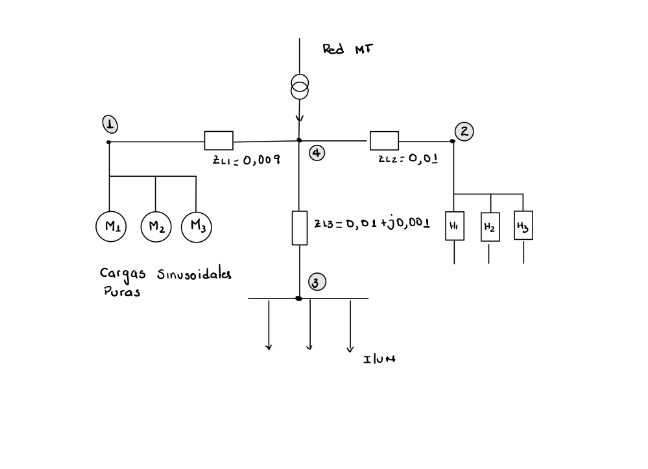

Esta red se encuentra debidamente instrumentada para los nodos 1, 2, 3. El sistema tomara las señales correspondientes a los voltajes de fase y las corrientes de linea a partir de un sistema de adquisicion de datos.
El codigo dado en la guia del proyecto para adquirir las funciones es el siguiente:


In [ ]:
!pip install matplotlib-venn




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


:::::::::::Valores de voltaje:::::::::::::::::: :
[[ 310.90446821  310.29096926  308.45289361 ...  305.39749531
   308.45289361  310.29096926]
 [-155.4522341  -138.23906393 -120.48032733 ... -203.1513854
  -187.97256628 -172.05190533]
 [-155.4522341  -172.05190533 -187.97256628 ... -102.24610991
  -120.48032733 -138.23906393]] ::::voltaje 1:::: 
[[ 307.75061421  307.166623    305.37038546 ...  302.23001897
   305.27743193  307.12005434]
 [-154.19645143 -137.16890228 -119.60001013 ... -201.3713053
  -186.36112257 -170.61545763]
 [-153.55416278 -169.99772072 -185.77037532 ... -100.85871366
  -118.91630936 -136.50459671]] ::::Voltaje 2::::
[[ 310.37305014  309.76532223  307.93509211 ...  304.86139739
   307.91623977  309.75587742]
 [-155.35547161 -138.15932264 -120.41792193 ... -203.00611149
  -187.8429727  -171.93850352]
 [-155.2096169  -171.79094388 -187.69429049 ... -102.06396226
  -120.27719493 -138.01574847]] :::Volatje  3::::


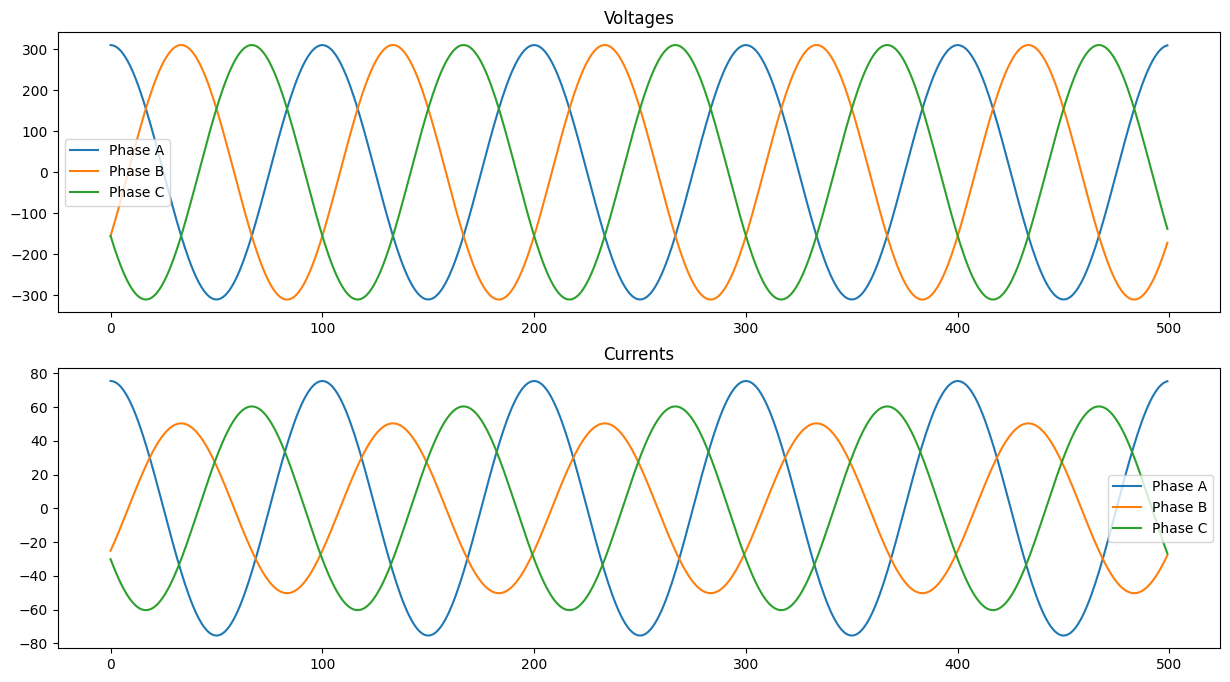

In [ ]:
import requests  # Importa librería para realizar solicitudes a un repositorio
import numpy as np

url = ('https://raw.githubusercontent.com/JulianDPastrana/signal_analysis/main/seniales_sep.py')  # Ruta del repositorio
r = requests.get(url)  # Se realiza la solicitud


with open('seniales_sep.py', 'w') as f:  # El archivo de la ruta es leído
   f.write(r.text)  # Se crea un nuevo documento en donde se copia el código contenido en el archivo
from seniales_sep import signal_generation  # Se importa la función que genera las señales

data = signal_generation()  # Las señales están contenidas en un diccionario

voltaje_1, current_1=data["Node 1"]
voltage_1, current_1 = data["Node 1"]
voltage_2, current_2 = data["Node 2"]
voltage_3, current_3 = data["Node 3"]

# Muestra los valores de voltaje para el nodo 1
print(":::::::::::Valores de voltaje:::::::::::::::::: :")
print(voltage_1,"::::voltaje 1:::: ")
print(voltage_2,"::::Voltaje 2::::" )
print(voltage_3,":::Volatje  3::::")
# Muestra los valores de las potencias  para el nodo
import matplotlib.pyplot as plt  # Importa librería para realizar gráficas
fig, axs = plt.subplots(2, 1, figsize=(15, 8))  # Se crea la figura
axs[0].plot(voltage_3.T)  # Grafica las señales de tensión en el nodo 3
axs[0].set_title("Voltages")
axs[0].legend(["Phase A", "Phase B", "Phase C"])
axs[1].plot(current_3.T)  # Grafica las señales de corriente en el nodo 3
axs[1].set_title("Currents")
axs[1].legend(["Phase A", "Phase B", "Phase C"])

plt.show()


Este proyecto presenta dos desafíos que consisten en una serie de preguntas que abordaremos de manera secuencial. 
El primer reto requiere que encontremos:

-La potencia de cada una de las señales. 

-El verdadero valor r.m.s. de las señales de voltaje y corriente.

-El valor de las impedancias de carga. 

-La potencia instantánea por fase. 

-La potencia activa por fase y total. 

-La potencia reactiva por fase y total. 

-La potencia aparente por fase y total. 

-El factor de potencia. 

-El consumo de la energía de la carga en kWh y su costo total (contador de Energía).




1. Para el calculo de la potencia para cada señal se hizo uso de la formula de potencia promedio 

 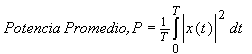

Primero, se definen las constantes N y K. N se establece en 500 y K se establece en 1/N. Luego, se calcula la potencia para cada señal de voltaje y corriente utilizando la fórmula (1/N)*sum(x^2), donde x es la señal de voltaje o corriente. 

In [ ]:
 # Calculo de potencia para cada señal 


N=500
K=1/N


# (1/N)*sum(vn)

voltagen1=K*np.sum(voltage_1**2,axis=1)
voltagen2=K*np.sum(voltage_2**2,axis=1)
voltagen3=K*np.sum(voltage_3**2,axis=1)


currentn1=K*np.sum(current_1**2,axis=1)
currentn2=K*np.sum(current_2**2,axis=1)
currentn3=K*np.sum(current_3**2,axis=1)


print(" POTENCIA SEÑAL VOLTAGES")
print("node 1:",voltagen1[0],voltagen1[1],voltagen1[2])
print("node 2:",voltagen2[0],voltagen2[1],voltagen2[2])
print("node 3:",voltagen3[0],voltagen3[1],voltagen3[2])


print("POTENCIA SEÑAL CURRENTS")
print("node 1:",currentn1[0],currentn1[1],voltagen1[2])
print("node 2:",currentn2[0],currentn2[1],voltagen2[2])
print("node 3:",currentn3[0],currentn3[1],voltagen3[2])


 POTENCIA SEÑAL VOLTAGES
node 1: 48330.79417500841 48330.79417500841 48330.794175008414
node 2: 47355.28902855381 47355.2890285538 47355.289028553816
node 3: 48165.71795536204 48243.623234057246 48212.438532407
POTENCIA SEÑAL CURRENTS
node 1: 305.63676056066936 305.63676056066925 48330.794175008414
node 2: 57686.913315127575 57686.91331512755 47355.289028553816
node 3: 2841.9416517486575 1265.1281461889585 48212.438532407


Para el calculo de la potencia instantanea para cada nodo, multiplicando las señales de voltaje y corriente correspondientes en cada instante de tiempo. 

P(t) =  V(t) * I(t)

Las variables "Phn" para cada nodo se calcula multiplicando la señal de voltaje  por la señal de corriente en el nodo . De manera similar para cada uno de los nodos del circuito.

Cabe destacar que los valores que se imprimirán en pantalla son vectores que representan la potencia instantánea a lo largo del tiempo para cada nodo.


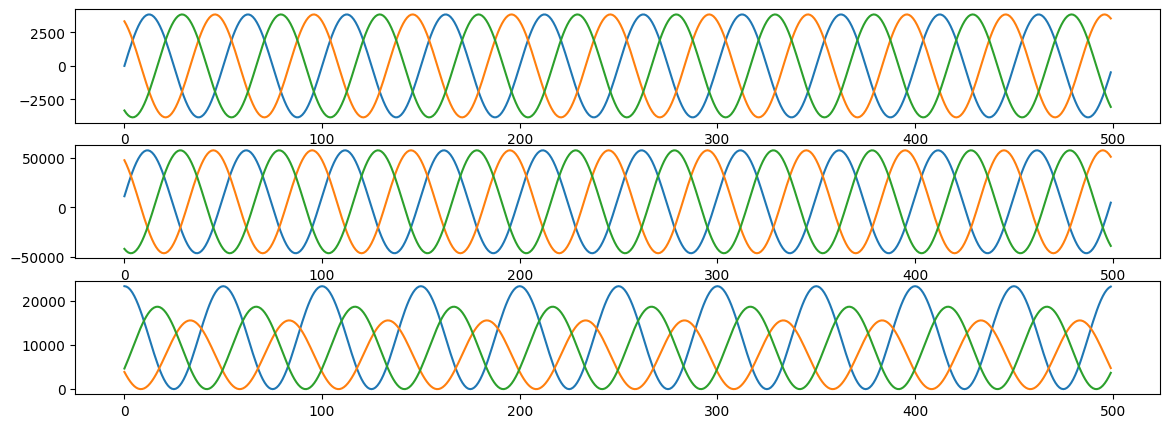

In [ ]:
 # Calculo de  POTENCIA intantanea
Ph1=voltage_1*current_1
Ph2=voltage_2*current_2
Ph3=voltage_3*current_3
 #Al imprimir estos valores en pantalla van a ser  vectores que estan el tiempo.

fig,ax1=plt.subplots(3,1,figsize=(14,5))
ax1[0].plot(Ph1.T)
ax1[1].plot(Ph2.T)
ax1[2].plot(Ph3.T)



2. Para el calculo de los valores rms de una señal discreta se hace uso de la siguiente formula 

RMS = sqrt(1/N * (x1^2 + x2^2 + ... + xN^2))

Donde x1, x2, ..., xN son los valores de la señal en cada punto de tiempo.

la función np.sum() para sumar los cuadrados de las señales de voltaje y corriente y la variable N para calcular el promedio

In [ ]:

 # Calculo de  rms o valores eficases 

voltage1_rms = np.sqrt( (1/N)*np.sum(voltage_1**2, axis=1) ) 
current1_rms = np.sqrt( (1/N)*np.sum(current_1**2, axis=1) ) 
voltage2_rms = np.sqrt( (1/N)*np.sum(voltage_2**2, axis=1) )
current2_rms = np.sqrt( (1/N)*np.sum(current_2**2, axis=1) )
voltage3_rms = np.sqrt( (1/N)*np.sum(voltage_3**2, axis=1) )
current3_rms = np.sqrt( (1/N)*np.sum(current_3**2, axis=1) )

print(f"Valor r.m.s. de las señales de voltaje   en el nodo 1:A {voltage1_rms[0]: .4f} B {voltage1_rms[1]: .4f} C {voltage1_rms[2]: .4f} " )
print(f"Valor r.m.s. de las señales de voltaje   en el nodo 2:A {voltage2_rms[0]: .4f} B {voltage2_rms[1]: .4f} C {voltage2_rms[2]: .4f} " )
print(f"Valor r.m.s. de las señales de voltaje   en el nodo 3:A {voltage3_rms[0]: .4f} B {voltage3_rms[1]: .4f} C {voltage3_rms[2]: .4f} " )
print(f"Valor r.m.s. de las señales de corriente en el nodo 1:A {current1_rms[0]: .4f} B {current1_rms[1]: .4f} C {current1_rms[2]: .4f} " )
print(f"Valor r.m.s. de las señales de corriente en el nodo 2:A {current2_rms[0]: .4f} B {current2_rms[1]: .4f} C {current2_rms[2]: .4f} " )
print(f"Valor r.m.s. de las señales de corriente en el nodo 3:A {current3_rms[0]: .4f} B {current3_rms[1]: .4f} C {current3_rms[2]: .4f} " )






Valor r.m.s. de las señales de voltaje   en el nodo 1:A  219.8427 B  219.8427 C  219.8427 
Valor r.m.s. de las señales de voltaje   en el nodo 2:A  217.6127 B  217.6127 C  217.6127 
Valor r.m.s. de las señales de voltaje   en el nodo 3:A  219.4669 B  219.6443 C  219.5733 
Valor r.m.s. de las señales de corriente en el nodo 1:A  17.4825 B  17.4825 C  17.4825 
Valor r.m.s. de las señales de corriente en el nodo 2:A  240.1810 B  240.1810 C  240.1810 
Valor r.m.s. de las señales de corriente en el nodo 3:A  53.3099 B  35.5686 C  42.6686 


In [ ]:
# Calcular la potencia aparente de cada nodo 
 
SN_1=voltage1_rms*current1_rms
SN_2=voltage2_rms*current2_rms
SN_3=voltage3_rms*current3_rms


print(f"valor de la potencia aparente nodo 1:A {SN_1[0]: .4f} B {SN_1[1]: .4f} C {SN_1[1]: .4f} ") 
print(f"valor de la potencia aparente nodo 2:A {SN_2[0]: .4f} B {SN_2[1]: .4f} C {SN_2[1]: .4f} ")
print(f"valor de la potencia aparente nodo 3:A {SN_3[0]: .4f} B {SN_3[1]: .4f} C {SN_3[1]: .4f} ") 




valor de la potencia aparente nodo 1:A  3843.3927 B  3843.3927 C  3843.3927 
valor de la potencia aparente nodo 2:A  52266.4372 B  52266.4372 C  52266.4372 
valor de la potencia aparente nodo 3:A  11699.7504 B  7812.4494 C  7812.4494 


Para el Calculo de la potencia activa total del circuito a partir de la potencia instantanea podemos realizar la suma de cada una de las potencias activas en cada uno de los nodos.

In [ ]:
 # Calculo  de la potencia activa apartir de la media de la potencia instantanea 


PA_N1=np.mean(Ph1,axis=1)
PA_N2=np.mean(Ph2,axis=1)
PA_N3=np.mean(Ph3,axis=1)


print(f"valor de la potencia ACTIVA   nodo 1:A   {PA_N1[0]: .4f} B {PA_N1[1]: .4f} C {PA_N1[2]: .4f} ") 
print(f"valor de la potencia ACTIVA   nodo 2:A {PA_N2[0]: .4f} B {PA_N2[1]: .4f} C {PA_N2[2]: .4f} ") 
print(f"valor de la potencia ACTIVA   nodo 3:A {PA_N3[0]: .4f} B {PA_N3[1]: .4f} C {PA_N3[2]: .4f} ") 

PAtotal=PA_N1.sum()+PA_N2.sum()+ PA_N3.sum()



print("POTENCIA TOTAL:",PAtotal)


valor de la potencia ACTIVA   nodo 1:A    0.0000 B -0.0000 C  0.0000 
valor de la potencia ACTIVA   nodo 2:A  5768.6913 B  5768.6913 C  5768.6913 
valor de la potencia ACTIVA   nodo 3:A  11699.7504 B  7812.4494 C  9368.8793 
POTENCIA TOTAL: 46187.15313575757


Este código calcula el factor de potencia en cada uno de los nodos del sistema eléctrico, dividiendo la potencia activa (PA) entre la potencia aparente (SN) en cada nodo. utilizando las variables ya definidas de potencia activa y potencia aparente para cada nodo.

In [ ]:
 # Calculo  FP 
PfN1=PA_N1/SN_1
PfN2=PA_N2/SN_2
PfN3=PA_N3/SN_3

print(PfN1)
print(PfN2)
print(PfN3)


[ 4.54345930e-17 -1.71799555e-16  1.13586483e-16]
[0.11037085 0.11037085 0.11037085]
[1. 1. 1.]


Para el Calculo de la potencia reactiva total del circuito al igual que en la potencia activa podemos realizar la suma de cada una de las potencias reactivas en cada uno de los nodos y asi obtener la total del circuito 

 Como en el nodo 2 

In [ ]:
# Calculate power reactive
  


QRN1=np.sqrt(SN_1**2-PA_N1**2)
QRN2=np.sqrt(SN_2**2-PA_N2**2)
QRN3=np.sqrt(SN_3**2-PA_N3**2)

print("valor de la potencia REACTIVA   nodo 1:A  ",QRN1) 
print("valor de la potencia REACTIVA   nodo 2:A  ",QRN2) 
print("valor de la potencia REACTIVA   nodo 3:A  ",QRN3) 

PRtotal=QRN1.sum()+QRN2.sum()+ QRN3.sum()

print("POWER REACTIVE TOTAL:",PRtotal)


valor de la potencia REACTIVA   nodo 1:A   [3843.39268967 3843.39268967 3843.39268967]
valor de la potencia REACTIVA   nodo 2:A   [51947.11400573 51947.11400573 51947.11400573]
valor de la potencia REACTIVA   nodo 3:A   [0.00017263 0.         0.        ]
POWER REACTIVE TOTAL: 167371.52025883188


In [ ]:
# apparent power total 
Papartt=np.sqrt(PRtotal**2+PAtotal**2)

print("APPARENT POWER TOTAL ",Papartt)


APPARENT POWER TOTAL  173627.41404668358


Para obtener el calculo del consumo de energia y su costo total  se hace uso de la potencia activa total del sistema anteriormente calculada 

 -La variable PAtotal es la suma de las potencias activas en los tres nodos del sistema, multiplicada por 1 hora. Al dividir entre 1000, se convierte la unidad de medida de vatios-hora (Wh) a kilovatios-hora (kWh).

 -Se multiplica el valor de la energía consumida en kWh (PENERGIA) por el costo por kWh, que en este caso se asume es de 700 pesos.

In [ ]:
# Calculo del consumo de la energía de la carga en kWh y su costo total (contador de Energía)

PENERGIA=(PAtotal*1)/1000
print(PENERGIA)
print("valor en pesos",PENERGIA*700)



46.187153135757576
valor en pesos 32331.007195030303


**2. Desarrollar en Colaboratory un Analizador de línea que enseñe la siguiente
información para los nodos del 1 al 4**

Para enseñar la informacion en el analizador de linea de las señales trifasicas en el tiempo para v (t) e i(t) y la corriente a traves del neutro se genera una figura que contiene seis subgráficos, cada uno mostrando las señales de voltaje y corriente para cada una de las tres fases (A, B y C) de los nodos 1, 2 y 3. Para ello, se utiliza la función plot() de la librería Matplotlib para graficar las señales de voltaje y corriente de cada fase de cada nodo.

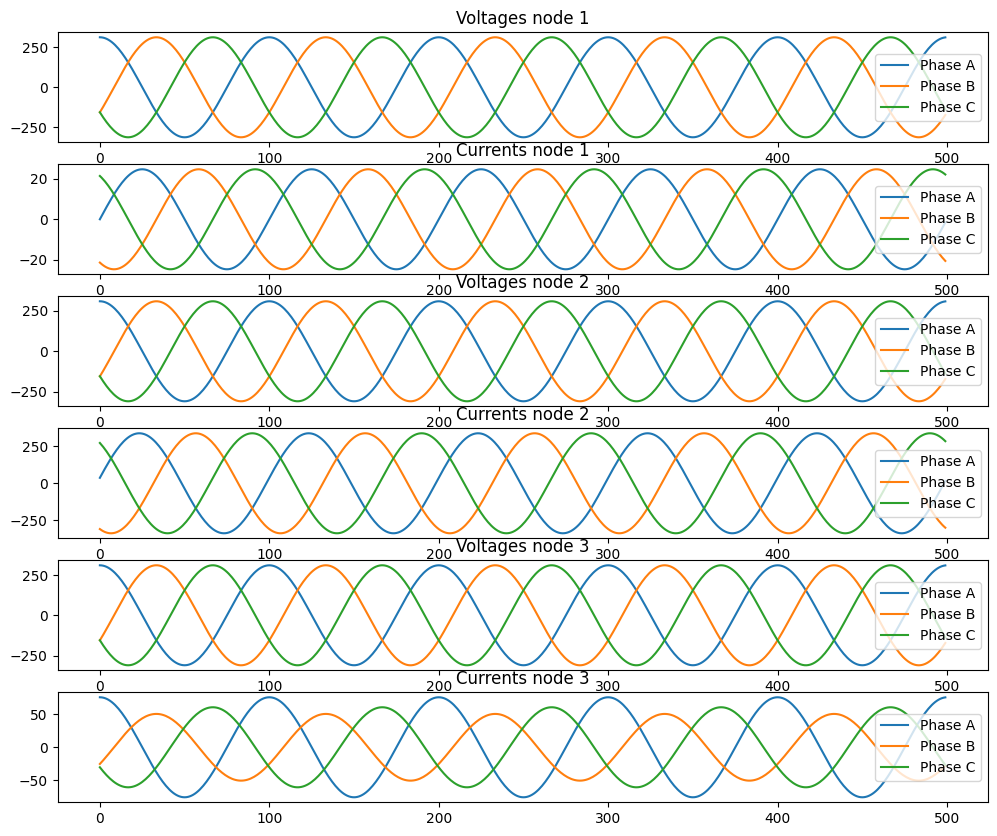

In [ ]:
# Las señales trifásicas en el tiempo para v(t), i(t) y la corriente a través del neutro

fig, axs = plt.subplots(6, 1, figsize=(12, 10))  # Se crea la figura
axs[0].plot(voltage_1.T)  # Grafica las señales de tensión en el nodo 3
axs[0].set_title("Voltages node 1")
axs[0].legend(["Phase A", "Phase B", "Phase C"], loc="right")
axs[1].plot(current_1.T)  # Grafica las señales de corriente en el nodo 3
axs[1].set_title("Currents node 1")
axs[1].legend(["Phase A", "Phase B", "Phase C"], loc="right")

axs[2].plot(voltage_2.T)  # Grafica las señales de tensión en el nodo 3
axs[2].set_title("Voltages node 2")
axs[2].legend(["Phase A", "Phase B", "Phase C"], loc="right")
axs[3].plot(current_2.T)  # Grafica las señales de corriente en el nodo 3
axs[3].set_title("Currents node 2")
axs[3].legend(["Phase A", "Phase B", "Phase C"], loc="right")

axs[4].plot(voltage_3.T)  # Grafica las señales de tensión en el nodo 3
axs[4].set_title("Voltages node 3")
axs[4].legend(["Phase A", "Phase B", "Phase C"], loc="right")

axs[5].plot(current_3.T)  # Grafica las señales de corriente en el nodo 3
axs[5].set_title("Currents node 3")
axs[5].legend(["Phase A", "Phase B", "Phase C"], loc="right")

plt.show()

In [ ]:

#Diagrama fasorial

voltage1_rms = np.sqrt( (1/N)*np.sum(voltage_1**2, axis=1) ) 
current1_rms = np.sqrt( (1/N)*np.sum(current_1**2, axis=1) ) 
# extract the three phases
FASEA =np.degrees( np.angle(voltage_1[0]))

print("magnitud ",voltage1_rms[0],"phase",FASEA[0])
print("magnitud ",voltage1_rms[1],"phase",FASEA[1])
print("magnitud ",voltage1_rms[2],"phase",FASEA[2])



voltage2_rms = np.sqrt( (1/N)*np.sum(voltage_2**2, axis=1) ) 
current1_rms = np.sqrt( (1/N)*np.sum(current_2**2, axis=1) ) 
# extract the three phases
FASEA =np.degrees( np.angle(voltage_2[0]))

print("magnitud ",voltage2_rms[0],"phase",FASEA[0])
print("magnitud ",voltage2_rms[1],"phase",FASEA[1])
print("magnitud ",voltage2_rms[2],"phase",FASEA[2])
print(voltage_1)




magnitud  219.84265776916092 phase 0.0
magnitud  219.84265776916092 phase 0.0
magnitud  219.84265776916092 phase 0.0
magnitud  217.61270419843095 phase 0.0
magnitud  217.61270419843095 phase 0.0
magnitud  217.61270419843098 phase 0.0
[[ 310.90446821  310.29096926  308.45289361 ...  305.39749531
   308.45289361  310.29096926]
 [-155.4522341  -138.23906393 -120.48032733 ... -203.1513854
  -187.97256628 -172.05190533]
 [-155.4522341  -172.05190533 -187.97256628 ... -102.24610991
  -120.48032733 -138.23906393]]


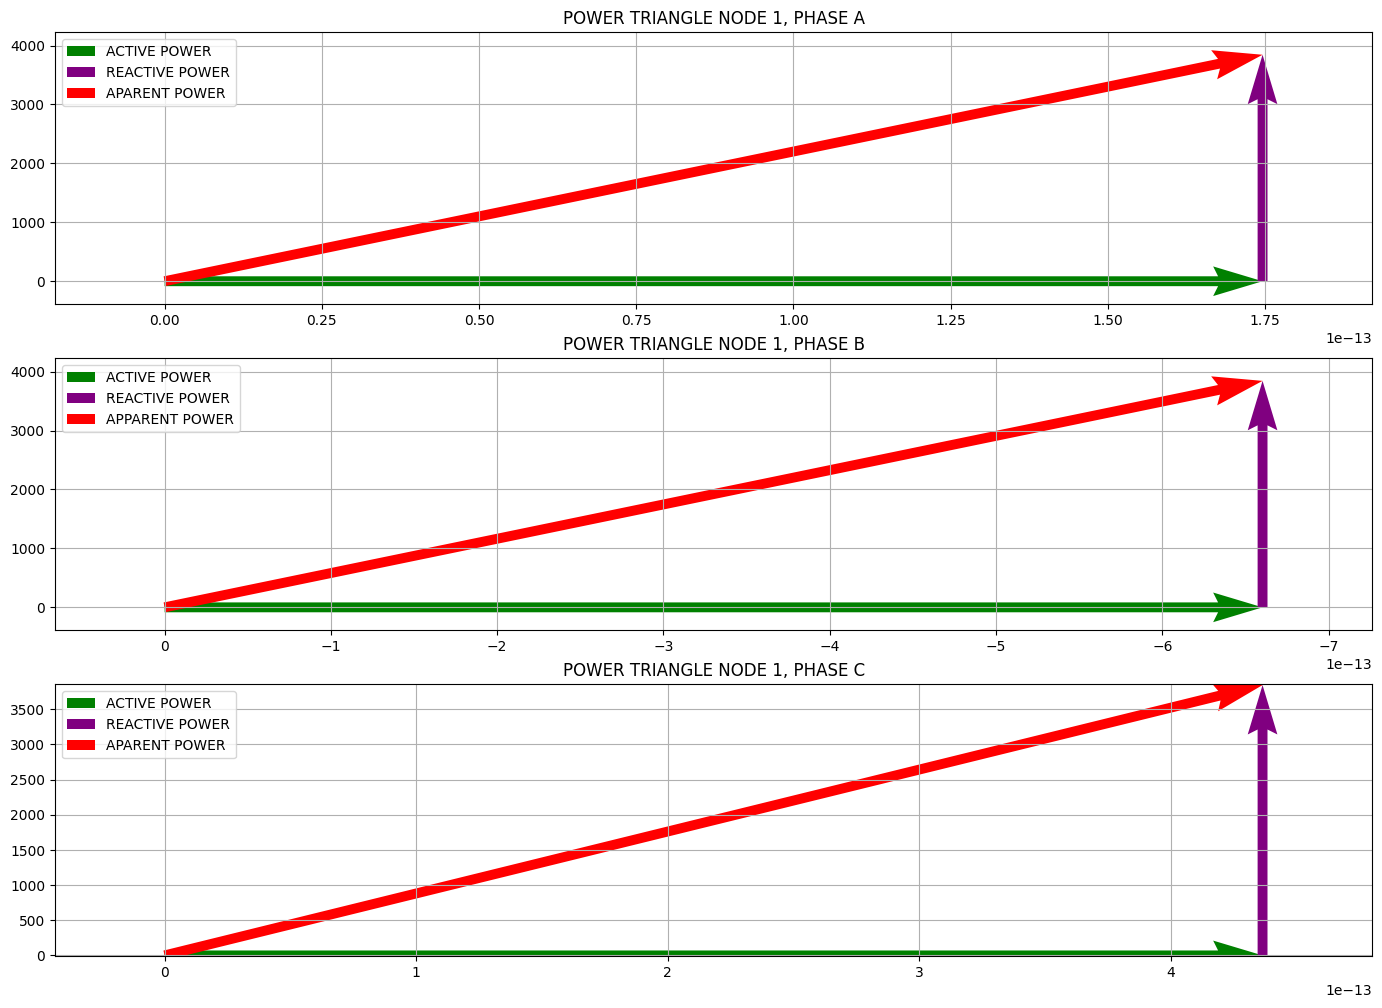

In [ ]:
fig2, ax2 = plt.subplots(3, 1, figsize=(17, 12))
ax2[0].quiver(0, 0, PA_N1[0], 0, angles='xy', color=['green'], scale_units='xy', scale=1, label='ACTIVE POWER')
ax2[0].quiver(PA_N1[0], 0, 0, QRN1[0], angles='xy', color=['purple'], scale_units='xy', scale=1, label='REACTIVE POWER')
ax2[0].quiver(0, 0, PA_N1[0], QRN1[0], angles='xy', color=['red'], scale_units='xy', scale=1, label='APARENT POWER')
ax2[0].set_ylim(-QRN1[0]*0.1,QRN1[0]*1.1 )
plt.axis([0,PA_N1[0] + 10, -10, QRN1[0] + 10])
ax2[0].set_xlim(-PA_N1[0]*0.1,PA_N1[0]*1.1 )
ax2[0].set_title("POWER TRIANGLE NODE 1, PHASE A")

ax2[1].quiver(0, 0, PA_N1[1], 0, angles='xy', color=['green'], scale_units='xy', scale=1, label='ACTIVE POWER')
ax2[1].quiver(PA_N1[1], 0, 0, QRN1[1], angles='xy', color=['purple'], scale_units='xy', scale=1, label='REACTIVE POWER')
ax2[1].quiver(0, 0, PA_N1[1], QRN1[1], angles='xy', color=['red'], scale_units='xy', scale=1, label='APPARENT POWER')
ax2[1].set_ylim(-QRN1[1]*0.1,QRN1[1]*1.1 )
plt.axis([0, PA_N1[1] + 10, -10, QRN1[1] + 10])
ax2[1].set_xlim(-PA_N1[1]*0.1,PA_N1[1]*1.1 )
ax2[1].set_title("POWER TRIANGLE NODE 1, PHASE B")

ax2[2].quiver(0, 0, PA_N1[2], 0, angles='xy', color=['green'], scale_units='xy', scale=1, label='ACTIVE POWER')
ax2[2].quiver(PA_N1[2], 0, 0, QRN1[2], angles='xy', color=['purple'], scale_units='xy', scale=1, label='REACTIVE POWER')
ax2[2].quiver(0, 0, PA_N1[2], QRN1[2], angles='xy', color=['red'], scale_units='xy', scale=1, label='APARENT POWER')
ax2[2].set_ylim(-QRN1[2]*0.1,QRN1[2]*1.1 )
plt.axis([0,PA_N1[2] + 10, -10, QRN1[2] + 10])
ax2[2].set_xlim(-PA_N1[2]*0.1,PA_N1[2]*1.1 )
ax2[2].set_title("POWER TRIANGLE NODE 1, PHASE C")

ax2[0].legend(loc='upper left')
ax2[0].grid()
ax2[1].legend(loc='upper left')
ax2[1].grid()
ax2[2].legend(loc='upper left')
ax2[2].grid()
plt.show()

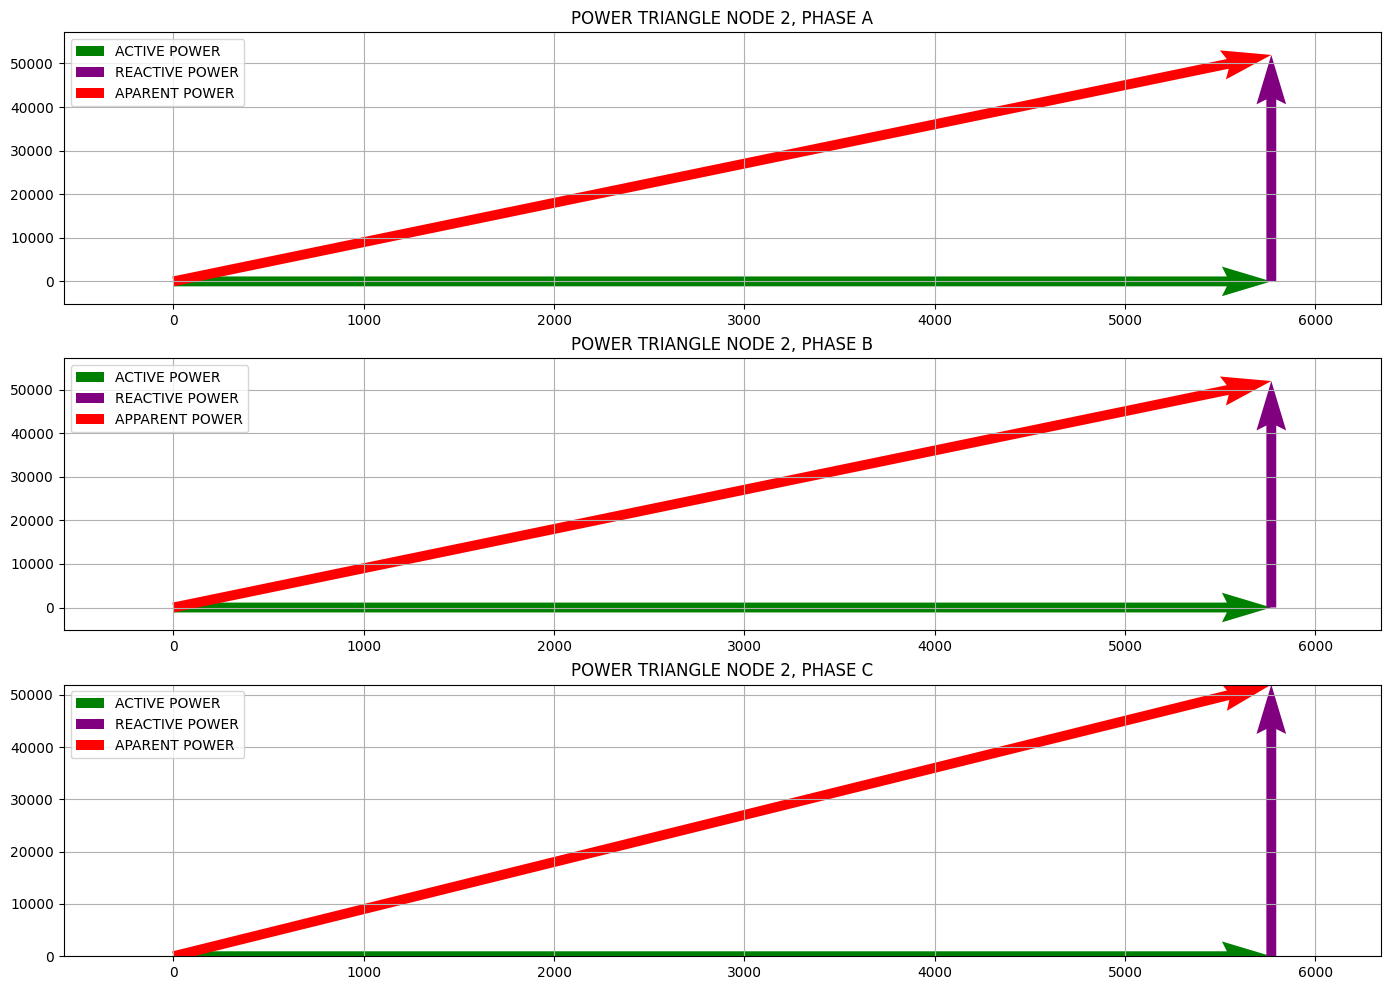

In [ ]:
fig2, ax2 = plt.subplots(3, 1, figsize=(17, 12))
ax2[0].quiver(0, 0, PA_N2[0], 0, angles='xy', color=['green'], scale_units='xy', scale=1, label='ACTIVE POWER')
ax2[0].quiver(PA_N2[0], 0, 0, QRN2[0], angles='xy', color=['purple'], scale_units='xy', scale=1, label='REACTIVE POWER')
ax2[0].quiver(0, 0, PA_N2[0], QRN2[0], angles='xy', color=['red'], scale_units='xy', scale=1, label='APARENT POWER')
ax2[0].set_ylim(-QRN2[0]*0.1,QRN2[0]*1.1 )
plt.axis([0,PA_N2[0] + 10, -10, QRN2[0] + 10])
ax2[0].set_xlim(-PA_N2[0]*0.1,PA_N2[0]*1.1 )
ax2[0].set_title("POWER TRIANGLE NODE 2, PHASE A")

ax2[1].quiver(0, 0, PA_N2[1], 0, angles='xy', color=['green'], scale_units='xy', scale=1, label='ACTIVE POWER')
ax2[1].quiver(PA_N2[1], 0, 0, QRN2[1], angles='xy', color=['purple'], scale_units='xy', scale=1, label='REACTIVE POWER')
ax2[1].quiver(0, 0, PA_N2[1], QRN2[1], angles='xy', color=['red'], scale_units='xy', scale=1, label='APPARENT POWER')
ax2[1].set_ylim(-QRN2[1]*0.1,QRN2[1]*1.1 )
plt.axis([0, PA_N2[1] + 10, -10, QRN2[1] + 10])
ax2[1].set_xlim(-PA_N2[1]*0.1,PA_N2[1]*1.1 )
ax2[1].set_title("POWER TRIANGLE NODE 2, PHASE B")

ax2[2].quiver(0, 0, PA_N2[2], 0, angles='xy', color=['green'], scale_units='xy', scale=1, label='ACTIVE POWER')
ax2[2].quiver(PA_N2[2], 0, 0, QRN2[2], angles='xy', color=['purple'], scale_units='xy', scale=1, label='REACTIVE POWER')
ax2[2].quiver(0, 0, PA_N2[2], QRN2[2], angles='xy', color=['red'], scale_units='xy', scale=1, label='APARENT POWER')
ax2[2].set_ylim(-QRN2[2]*0.1,QRN2[2]*1.1 )
plt.axis([0,PA_N2[2] + 10, -10, QRN2[2] + 10])
ax2[2].set_xlim(-PA_N2[2]*0.1,PA_N2[2]*1.1 )
ax2[2].set_title("POWER TRIANGLE NODE 2, PHASE C")

ax2[0].legend(loc='upper left')
ax2[0].grid()
ax2[1].legend(loc='upper left')
ax2[1].grid()
ax2[2].legend(loc='upper left')
ax2[2].grid()
plt.show()

<ipython-input-16-b416a5654922>:13: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax2[1].set_ylim(-QRN3[1]*0.1,QRN3[1]*1.1 )
<ipython-input-16-b416a5654922>:21: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax2[2].set_ylim(-QRN3[2]*0.1,QRN3[2]*1.1 )


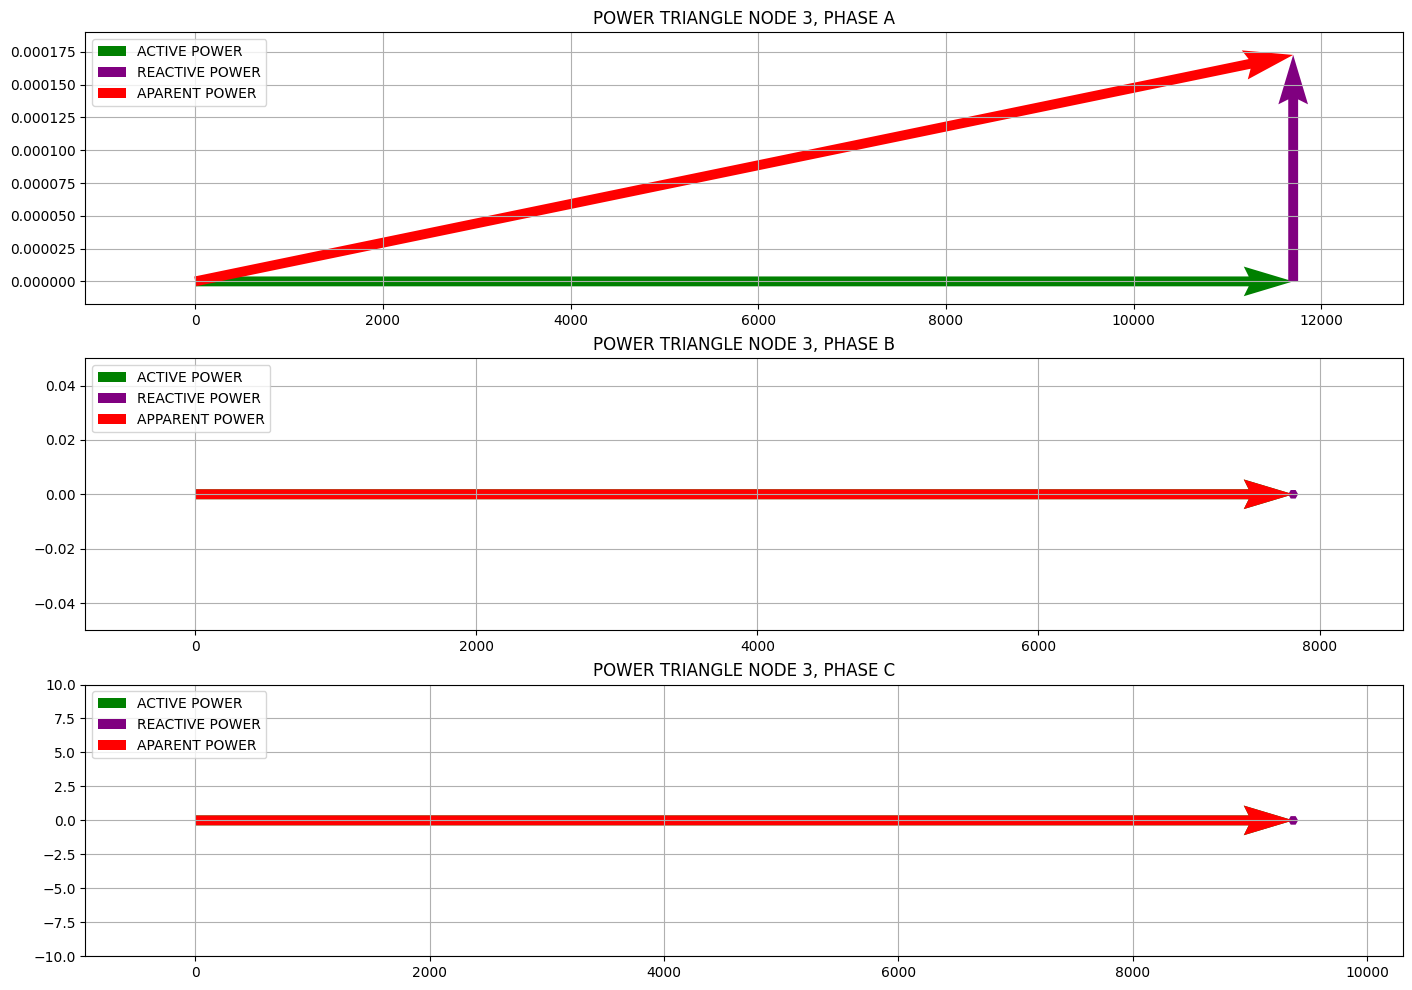

In [ ]:
fig2, ax2 = plt.subplots(3, 1, figsize=(17, 12))
ax2[0].quiver(0, 0, PA_N3[0], 0, angles='xy', color=['green'], scale_units='xy', scale=1, label='ACTIVE POWER')
ax2[0].quiver(PA_N3[0], 0, 0, QRN3[0], angles='xy', color=['purple'], scale_units='xy', scale=1, label='REACTIVE POWER')
ax2[0].quiver(0, 0, PA_N3[0], QRN3[0], angles='xy', color=['red'], scale_units='xy', scale=1, label='APARENT POWER')
ax2[0].set_ylim(-QRN3[0]*0.1,QRN3[0]*1.1 )
plt.axis([0,PA_N3[0] + 10, -10, QRN3[0] + 10])
ax2[0].set_xlim(-PA_N3[0]*0.1,PA_N3[0]*1.1 )
ax2[0].set_title("POWER TRIANGLE NODE 3, PHASE A")

ax2[1].quiver(0, 0, PA_N3[1], 0, angles='xy', color=['green'], scale_units='xy', scale=1, label='ACTIVE POWER')
ax2[1].quiver(PA_N3[1], 0, 0, QRN3[1], angles='xy', color=['purple'], scale_units='xy', scale=1, label='REACTIVE POWER')
ax2[1].quiver(0, 0, PA_N3[1], QRN3[1], angles='xy', color=['red'], scale_units='xy', scale=1, label='APPARENT POWER')
ax2[1].set_ylim(-QRN3[1]*0.1,QRN3[1]*1.1 )
plt.axis([0, PA_N3[1] + 10, -10, QRN3[1] + 10])
ax2[1].set_xlim(-PA_N3[1]*0.1,PA_N3[1]*1.1 )
ax2[1].set_title("POWER TRIANGLE NODE 3, PHASE B")

ax2[2].quiver(0, 0, PA_N3[2], 0, angles='xy', color=['green'], scale_units='xy', scale=1, label='ACTIVE POWER')
ax2[2].quiver(PA_N3[2], 0, 0, QRN3[2], angles='xy', color=['purple'], scale_units='xy', scale=1, label='REACTIVE POWER')
ax2[2].quiver(0, 0, PA_N3[2], QRN3[2], angles='xy', color=['red'], scale_units='xy', scale=1, label='APARENT POWER')
ax2[2].set_ylim(-QRN3[2]*0.1,QRN3[2]*1.1 )
plt.axis([0,PA_N3[2] + 10, -10, QRN3[2] + 10])
ax2[2].set_xlim(-PA_N3[2]*0.1,PA_N3[2]*1.1 )
ax2[2].set_title("POWER TRIANGLE NODE 3, PHASE C")

ax2[0].legend(loc='upper left')
ax2[0].grid()
ax2[1].legend(loc='upper left')
ax2[1].grid()
ax2[2].legend(loc='upper left')
ax2[2].grid()
plt.show()

VOLTAGE PHASE DIAGRAM

In [ ]:
F = 60
Vn1theta_a = (np.argmax(voltage_1[0])-np.argmax(voltage_1[0]))*(1/(100*F))*2*np.pi*F
Vn1theta_b = (np.argmax(voltage_1[0])-np.argmax(voltage_1[1]))*(1/(100*F))*2*np.pi*F
Vn1theta_c = (np.argmax(voltage_1[0])-np.argmax(voltage_1[2]))*(1/(100*F))*2*np.pi*F

Vn2theta_a = (np.argmax(voltage_1[0])-np.argmax(voltage_2[0]))*(1/(100*F))*2*np.pi*F
Vn2theta_b = (np.argmax(voltage_1[0])-np.argmax(voltage_2[1]))*(1/(100*F))*2*np.pi*F
Vn2theta_c = (np.argmax(voltage_1[0])-np.argmax(voltage_2[2]))*(1/(100*F))*2*np.pi*F

Vn3theta_a = (np.argmax(voltage_1[0])-np.argmax(voltage_3[0]))*(1/(100*F))*2*np.pi*F
Vn3theta_b = (np.argmax(voltage_1[0])-np.argmax(voltage_3[1]))*(1/(100*F))*2*np.pi*F
Vn3theta_c = (np.argmax(voltage_1[0])-np.argmax(voltage_3[2]))*(1/(100*F))*2*np.pi*F
print(f"Angle for current node 1. Phase A: {Vn1theta_a*180/np.pi: .3f}, Phase B: {Vn1theta_b*180/np.pi: .3f}, Phase C: {Vn1theta_c*180/np.pi: .3f}")
print(f"Angle for current node 2. Phase A: {Vn2theta_a*180/np.pi: .3f}, Phase B: {Vn2theta_b*180/np.pi: .3f}, Phase C: {Vn2theta_c*180/np.pi: .3f}")
print(f"Angle for current node 3. Phase A: {Vn3theta_a*180/np.pi: .3f}, Phase B: {Vn3theta_b*180/np.pi: .3f}, Phase C: {Vn3theta_c*180/np.pi: .3}")



Angle for current node 1. Phase A:  0.000, Phase B: -118.800, Phase C: -241.200
Angle for current node 2. Phase A:  0.000, Phase B: -118.800, Phase C: -241.200
Angle for current node 3. Phase A:  0.000, Phase B: -118.800, Phase C: -2.41e+02


Text(0.5, 1.0, 'VOLTAGES PHASE DIAGRAM NODE 3')

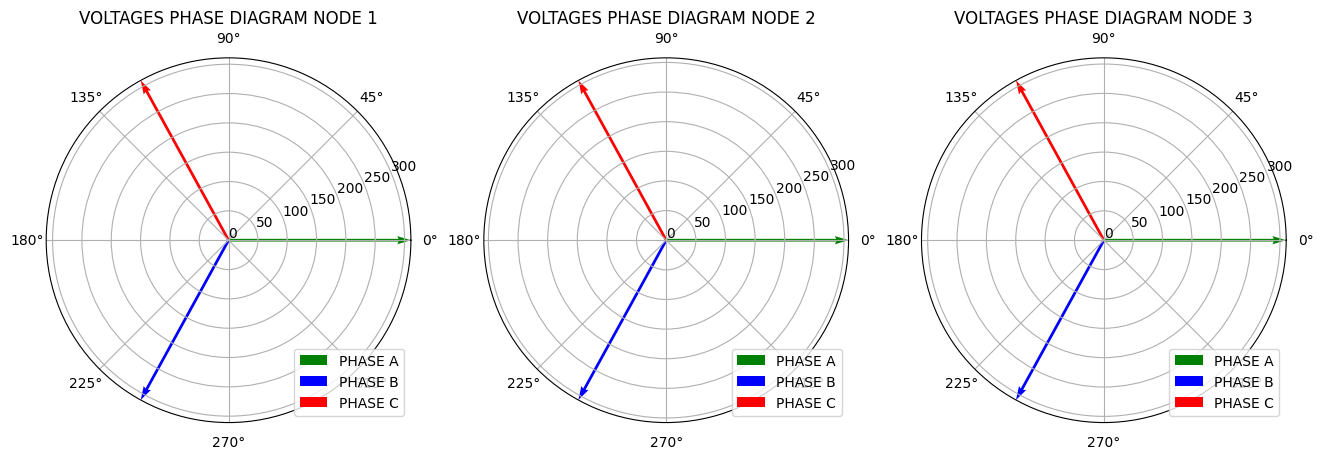

In [ ]:



fig5, ax5 = plt.subplots(1, 3, subplot_kw={'projection': 'polar'}, figsize=(16, 16))
ax5[0].quiver(Vn1theta_a, np.max(voltage_1[0]), angles='xy',  scale_units='xy', scale=1, color='green', label='PHASE A')
ax5[0].quiver(Vn1theta_b, np.max(voltage_1[1]), angles='xy', scale_units='xy', scale=1, color='blue', label='PHASE B')
ax5[0].quiver(Vn1theta_c, np.max(voltage_1[2]), angles='xy', scale_units='xy', scale=1, color='red', label='PHASE C')
ax5[0].set_rmax(np.max(voltage_1))
ax5[0].legend(loc="lower right")
ax5[0].set_title('VOLTAGES PHASE DIAGRAM NODE 1')

ax5[1].quiver(Vn2theta_a, np.max(voltage_2[0]), angles='xy',  scale_units='xy', scale=1, color='green', label='PHASE A')
ax5[1].quiver(Vn2theta_b, np.max(voltage_2[1]), angles='xy', scale_units='xy', scale=1, color='blue', label='PHASE B')
ax5[1].quiver(Vn2theta_c, np.max(voltage_2[2]), angles='xy', scale_units='xy', scale=1, color='red', label='PHASE C')
ax5[1].set_rmax(np.max(voltage_2))
ax5[1].legend(loc="lower right")
ax5[1].set_title('VOLTAGES PHASE DIAGRAM NODE 2')

ax5[2].quiver(Vn3theta_a, np.max(voltage_3[0]), angles='xy',  scale_units='xy', scale=1, color='green', label='PHASE A')
ax5[2].quiver(Vn3theta_b, np.max(voltage_3[1]), angles='xy', scale_units='xy', scale=1, color='blue', label='PHASE B')
ax5[2].quiver(Vn3theta_c, np.max(voltage_3[2]), angles='xy', scale_units='xy', scale=1, color='red', label='PHASE C')
ax5[2].set_rmax(np.max(voltage_3))
ax5[2].legend(loc="lower right")
ax5[2].set_title('VOLTAGES PHASE DIAGRAM NODE 3')



In [ ]:

V1fasor_a = np.max(voltage_1[0]) * np.exp(1j * Vn1theta_a)
V1fasor_b = np.max(voltage_1[1]) * np.exp(1j * Vn1theta_b)
V1fasor_c = np.max(voltage_1[2]) * np.exp(1j * Vn1theta_c)

V2fasor_a = np.max(voltage_2[0]) * np.exp(1j * Vn2theta_a)
V2fasor_b = np.max(voltage_2[1]) * np.exp(1j * Vn2theta_b)
V2fasor_c = np.max(voltage_2[2]) * np.exp(1j * Vn2theta_c)

V3fasor_a = np.max(voltage_3[0]) * np.exp(1j * Vn3theta_a)
V3fasor_b = np.max(voltage_3[1]) * np.exp(1j * Vn3theta_b)
V3fasor_c = np.max(voltage_3[2]) * np.exp(1j * Vn3theta_c)

print(f"Voltage fasor node 1 phase A, magnitude: {np.abs(V1fasor_a): .4f}, angle(degrees): {np.angle(V1fasor_a)*180/np.pi: .4f}")
print(f"Voltage fasor node 1 phase B, magnitude: {np.abs(V1fasor_b): .4f}, angle(degrees): {np.angle(V1fasor_b)*180/np.pi: .4f}")
print(f"Voltage fasor node 1 phase C, magnitude: {np.abs(V1fasor_c): .4f}, angle(degrees): {np.angle(V1fasor_c)*180/np.pi: .4f}")
print("")
print(f"Voltage fasor node 2 phase A, magnitude: {np.abs(V2fasor_a): .4f}, angle(degrees): {np.angle(V2fasor_a)*180/np.pi: .4f}")
print(f"Voltage fasor node 2 phase B, magnitude: {np.abs(V2fasor_b): .4f}, angle(degrees): {np.angle(V2fasor_b)*180/np.pi: .4f}")
print(f"Voltage fasor node 2 phase C, magnitude: {np.abs(V2fasor_c): .4f}, angle(degrees): {np.angle(V2fasor_c)*180/np.pi: .4f}")
print("")
print(f"Voltage fasor node 3 phase A, magnitude: {np.abs(V3fasor_a): .4f}, angle(degrees): {np.angle(V3fasor_a)*180/np.pi: .4f}")
print(f"Voltage fasor node 3 phase B, magnitude: {np.abs(V3fasor_b): .4f}, angle(degrees): {np.angle(V3fasor_b)*180/np.pi: .4f}")
print(f"Voltage fasor node 3 phase C, magnitude: {np.abs(V3fasor_c): .4f}, angle(degrees): {np.angle(V3fasor_c)*180/np.pi: .4f}")



Voltage fasor node 1 phase A, magnitude:  310.9045, angle(degrees):  0.0000
Voltage fasor node 1 phase B, magnitude:  310.8363, angle(degrees): -118.8000
Voltage fasor node 1 phase C, magnitude:  310.8363, angle(degrees):  118.8000

Voltage fasor node 2 phase A, magnitude:  307.7506, angle(degrees):  0.0000
Voltage fasor node 2 phase B, magnitude:  307.6754, angle(degrees): -118.8000
Voltage fasor node 2 phase C, magnitude:  307.6909, angle(degrees):  118.8000

Voltage fasor node 3 phase A, magnitude:  310.3731, angle(degrees):  0.0000
Voltage fasor node 3 phase B, magnitude:  310.5548, angle(degrees): -118.8000
Voltage fasor node 3 phase C, magnitude:  310.4567, angle(degrees):  118.8000


CURRENT PHASE DIAGRAM

In [ ]:
F = 60
In1theta_a = (np.argmax(voltage_1[0])-np.argmax(current_1[0]))*(1/(100*F))*2*np.pi*F
In1theta_b = (np.argmax(voltage_1[0])-np.argmax(current_1[1]))*(1/(100*F))*2*np.pi*F
In1theta_c = (np.argmax(voltage_1[0])-np.argmax(current_1[2]))*(1/(100*F))*2*np.pi*F

In2theta_a = (np.argmax(voltage_1[0])-np.argmax(current_2[0]))*(1/(100*F))*2*np.pi*F
In2theta_b = (np.argmax(voltage_1[0])-np.argmax(current_2[1]))*(1/(100*F))*2*np.pi*F
In2theta_c = (np.argmax(voltage_1[0])-np.argmax(current_2[2]))*(1/(100*F))*2*np.pi*F

In3theta_a = (np.argmax(voltage_1[0])-np.argmax(current_3[0]))*(1/(100*F))*2*np.pi*F
In3theta_b = (np.argmax(voltage_1[0])-np.argmax(current_3[1]))*(1/(100*F))*2*np.pi*F
In3theta_c = (np.argmax(voltage_1[0])-np.argmax(current_3[2]))*(1/(100*F))*2*np.pi*F

print(f"Angle for current node 1. Phase A: {In1theta_a*180/np.pi: .3f}, Phase B: {In1theta_b*180/np.pi: .3f}, Phase C: {In1theta_c*180/np.pi: .3f}")
print(f"Angle for current node 2. Phase A: {In2theta_a*180/np.pi: .3f}, Phase B: {In2theta_b*180/np.pi: .3f}, Phase C: {In2theta_c*180/np.pi: .3f}")
print(f"Angle for current node 3. Phase A: {In3theta_a*180/np.pi: .3f}, Phase B: {In3theta_b*180/np.pi: .3f}, Phase C: {In3theta_c*180/np.pi: .3f}")

Angle for current node 1. Phase A: -90.000, Phase B: -208.800, Phase C: -331.200
Angle for current node 2. Phase A: -802.800, Phase B: -925.200, Phase C: -324.000
Angle for current node 3. Phase A:  0.000, Phase B: -118.800, Phase C: -241.200


Text(0.5, 1.0, 'CURRENT PHASE DIAGRAM NODE 3')

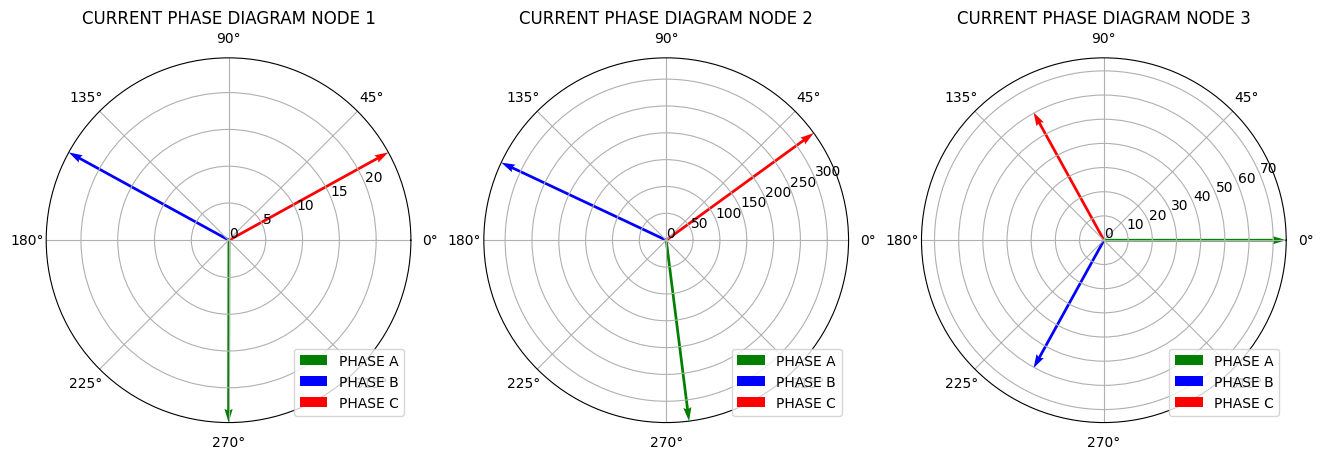

In [ ]:
fig6, ax6 = plt.subplots(1, 3, subplot_kw={'projection': 'polar'}, figsize=(16, 16))
ax6[0].quiver(In1theta_a, np.max(current_1[0]), angles='xy',  scale_units='xy', scale=1, color='green', label='PHASE A')
ax6[0].quiver(In1theta_b, np.max(current_1[1]), angles='xy', scale_units='xy', scale=1, color='blue', label='PHASE B')
ax6[0].quiver(In1theta_c, np.max(current_1[2]), angles='xy', scale_units='xy', scale=1, color='red', label='PHASE C')
ax6[0].set_rmax(np.max(current_1))
ax6[0].legend(loc="lower right")
ax6[0].set_title('CURRENT PHASE DIAGRAM NODE 1')

ax6[1].quiver(In2theta_a, np.max(current_2[0]), angles='xy',  scale_units='xy', scale=1, color='green', label='PHASE A')
ax6[1].quiver(In2theta_b, np.max(current_2[1]), angles='xy', scale_units='xy', scale=1, color='blue', label='PHASE B')
ax6[1].quiver(In2theta_c, np.max(current_2[2]), angles='xy', scale_units='xy', scale=1, color='red', label='PHASE C')
ax6[1].set_rmax(np.max(current_2))
ax6[1].legend(loc="lower right")
ax6[1].set_title('CURRENT PHASE DIAGRAM NODE 2')

ax6[2].quiver(In3theta_a, np.max(current_3[0]), angles='xy',  scale_units='xy', scale=1, color='green', label='PHASE A')
ax6[2].quiver(In3theta_b, np.max(current_3[2]), angles='xy', scale_units='xy', scale=1, color='blue', label='PHASE B')
ax6[2].quiver(In3theta_c, np.max(current_3[2]), angles='xy', scale_units='xy', scale=1, color='red', label='PHASE C')
ax6[2].set_rmax(np.max(current_3))
ax6[2].legend(loc="lower right")
ax6[2].set_title('CURRENT PHASE DIAGRAM NODE 3')

In [ ]:
I1fasor_a = np.max(current_1[0]) * np.exp(1j * In1theta_a)
I1fasor_b = np.max(current_1[1]) * np.exp(1j * In1theta_b)
I1fasor_c = np.max(current_1[2]) * np.exp(1j * In1theta_c)

I2fasor_a = np.max(current_2[0]) * np.exp(1j * In2theta_a)
I2fasor_b = np.max(current_2[1]) * np.exp(1j * In2theta_b)
I2fasor_c = np.max(current_2[2]) * np.exp(1j * In2theta_c)

I3fasor_a = np.max(current_3[0]) * np.exp(1j * In3theta_a)
I3fasor_b = np.max(current_3[1]) * np.exp(1j * In3theta_b)
I3fasor_c = np.max(current_3[2]) * np.exp(1j * In3theta_c)

print(f"Current fasor node 1 phase A, magnitude: {np.abs(I1fasor_a): .4f}, angle(degrees): {np.angle(I1fasor_a)*180/np.pi: .4f}")
print(f"Current fasor node 1 phase B, magnitude: {np.abs(I1fasor_b): .4f}, angle(degrees): {np.angle(I1fasor_b)*180/np.pi: .4f}")
print(f"Current fasor node 1 phase C, magnitude: {np.abs(I1fasor_c): .4f}, angle(degrees): {np.angle(I1fasor_c)*180/np.pi: .4f}")
print("")
print(f"Current fasor node 2 phase A, magnitude: {np.abs(I2fasor_a): .4f}, angle(degrees): {np.angle(I2fasor_a)*180/np.pi: .4f}")
print(f"Current fasor node 2 phase B, magnitude: {np.abs(I2fasor_b): .4f}, angle(degrees): {np.angle(I2fasor_b)*180/np.pi: .4f}")
print(f"Current fasor node 2 phase C, magnitude: {np.abs(I2fasor_c): .4f}, angle(degrees): {np.angle(I2fasor_c)*180/np.pi: .4f}")
print("")
print(f"Current fasor node 3 phase A, magnitude: {np.abs(I3fasor_a): .4f}, angle(degrees): {np.angle(I3fasor_a)*180/np.pi: .4f}")
print(f"Current fasor node 3 phase B, magnitude: {np.abs(I3fasor_b): .4f}, angle(degrees): {np.angle(I3fasor_b)*180/np.pi: .4f}")
print(f"Current fasor node 3 phase C, magnitude: {np.abs(I3fasor_c): .4f}, angle(degrees): {np.angle(I3fasor_c)*180/np.pi: .4f}")

Current fasor node 1 phase A, magnitude:  24.7239, angle(degrees): -90.0000
Current fasor node 1 phase B, magnitude:  24.7185, angle(degrees):  151.2000
Current fasor node 1 phase C, magnitude:  24.7185, angle(degrees):  28.8000

Current fasor node 2 phase A, magnitude:  339.6223, angle(degrees): -82.8000
Current fasor node 2 phase B, magnitude:  339.5558, angle(degrees):  154.8000
Current fasor node 2 phase C, magnitude:  339.6635, angle(degrees):  36.0000

Current fasor node 3 phase A, magnitude:  75.3915, angle(degrees):  0.0000
Current fasor node 3 phase B, magnitude:  50.2905, angle(degrees): -118.8000
Current fasor node 3 phase C, magnitude:  60.3295, angle(degrees):  118.8000


Voltage and current for node 4

In [ ]:
#  impedances
Zl1 = 0.009j
Zl2 = 0.01j
Zl3 = 0.01 + 0.001j

# Current per phase at node 4
I4fasor_a = I1fasor_a + I2fasor_a + I3fasor_a
I4fasor_b = I1fasor_b + I2fasor_b + I3fasor_b
I4fasor_c = I1fasor_c + I2fasor_c + I3fasor_c

# Voltage per phase at node 4
V4fasor_a = ((V1fasor_a/Zl1) + (V2fasor_a/Zl2) + (V3fasor_a/Zl3) + (I4fasor_a) ) / ( (1/Zl1) + (1/Zl2) + (1/Zl3))
V4fasor_b = ((V1fasor_b/Zl1) + (V2fasor_b/Zl2) + (V3fasor_b/Zl3) + (I4fasor_b) ) / ( (1/Zl1) + (1/Zl2) + (1/Zl3))
V4fasor_c = ((V1fasor_c/Zl1) + (V2fasor_c/Zl2) + (V3fasor_c/Zl3) + (I4fasor_c) ) / ( (1/Zl1) + (1/Zl2) + (1/Zl3))

print(f"Voltage fasor node 4 phase A, magnitude: {np.abs(V4fasor_a): .4f}, angle(degrees): {np.angle(V4fasor_a)*180/np.pi: .4f}")
print(f"Voltage fasor node 4 phase B, magnitude: {np.abs(V4fasor_b): .4f}, angle(degrees): {np.angle(V4fasor_b)*180/np.pi: .4f}")
print(f"Voltage fasor node 4 phase C, magnitude: {np.abs(V4fasor_c): .4f}, angle(degrees): {np.angle(V4fasor_c)*180/np.pi: .4f}")
print("")
print(f"Current fasor node 4 phase A, magnitude: {np.abs(I4fasor_a): .4f}, angle(degrees): {np.angle(I4fasor_a)*180/np.pi: .4f}")
print(f"Current fasor node 4 phase B, magnitude: {np.abs(I4fasor_b): .4f}, angle(degrees): {np.angle(I4fasor_b)*180/np.pi: .4f}")
print(f"Current fasor node 4 phase C, magnitude: {np.abs(I4fasor_c): .4f}, angle(degrees): {np.angle(I4fasor_c)*180/np.pi: .4f}")

Voltage fasor node 4 phase A, magnitude:  311.1694, angle(degrees):  0.0326
Voltage fasor node 4 phase B, magnitude:  311.0787, angle(degrees): -118.7835
Voltage fasor node 4 phase C, magnitude:  311.1102, angle(degrees):  118.8318

Current fasor node 4 phase A, magnitude:  380.4180, angle(degrees): -71.9363
Current fasor node 4 phase B, magnitude:  370.5891, angle(degrees):  162.3417
Current fasor node 4 phase C, magnitude:  376.0560, angle(degrees):  44.6805


Text(0.5, 1.0, 'CURRENT PHASE DIAGRAM NODE 4')

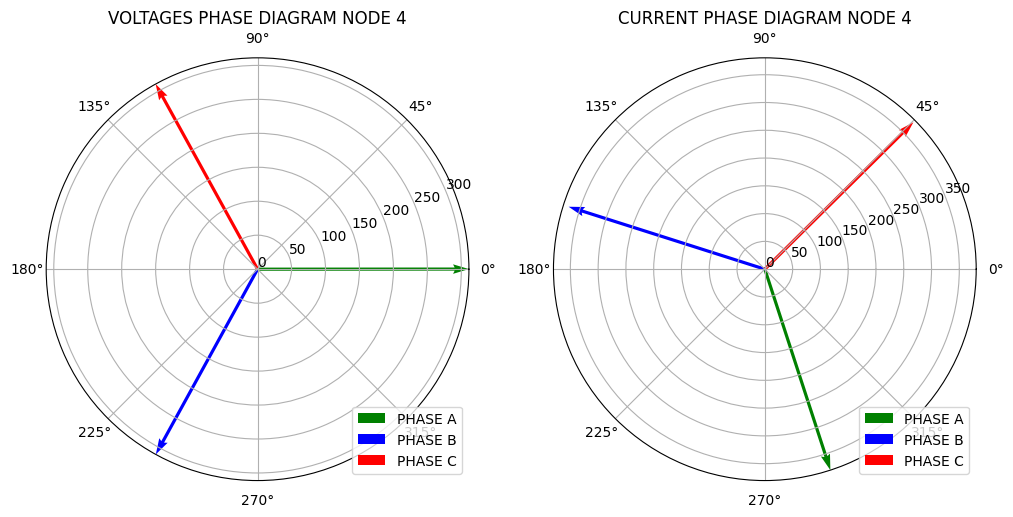

In [ ]:
fig7, ax7 = plt.subplots(1, 2, subplot_kw={'projection': 'polar'}, figsize=(12, 8))
ax7[0].quiver(np.angle(V4fasor_a), np.abs(V4fasor_a), angles='xy', scale_units='xy', scale=1, color='green', label='PHASE A')
ax7[0].quiver(np.angle(V4fasor_b), np.abs(V4fasor_b), angles='xy', scale_units='xy', scale=1, color='blue', label='PHASE B')
ax7[0].quiver(np.angle(V4fasor_c), np.abs(V4fasor_c), angles='xy', scale_units='xy', scale=1, color='red', label='PHASE C')
ax7[0].set_rmax(np.abs(V4fasor_a))
ax7[0].legend(loc="lower right")
ax7[0].set_title('VOLTAGES PHASE DIAGRAM NODE 4')

ax7[1].quiver(np.angle(I4fasor_a), np.abs(I4fasor_a), angles='xy', scale_units='xy', scale=1, color='green', label='PHASE A')
ax7[1].quiver(np.angle(I4fasor_b), np.abs(I4fasor_b), angles='xy', scale_units='xy', scale=1, color='blue', label='PHASE B')
ax7[1].quiver(np.angle(I4fasor_c), np.abs(I4fasor_c), angles='xy', scale_units='xy', scale=1, color='red', label='PHASE C')
ax7[1].set_rmax(np.abs(I4fasor_a))
ax7[1].legend(loc="lower right")
ax7[1].set_title('CURRENT PHASE DIAGRAM NODE 4')

**Potencia nodo 4**


In [ ]:
S4com_a = V4fasor_a * I4fasor_a.conjugate()
S4com_b = V4fasor_b * I4fasor_b.conjugate()
S4com_c = V4fasor_c * I4fasor_c.conjugate()

print(f"Complex power at node 4, phase A: {S4com_a: .4f}")
print(f"Complex power at node 4, phase B: {S4com_b: .4f}")
print(f"Complex power at node 4, phase C: {S4com_c: .4f}")

Complex power at node 4, phase A:  36640.7472+112560.9329j
Complex power at node 4, phase B:  22244.2786+113115.9313j
Complex power at node 4, phase C:  31950.8935+112547.4695j




---



In [ ]:
# Active power calculation at node 4
P4_a = np.real(S4com_a)
P4_b = np.real(S4com_b)
P4_c = np.real(S4com_c)
# Reactive power calculation at node 4
Q4_a = np.imag(S4com_a)
Q4_b = np.imag(S4com_b)
Q4_c = np.imag(S4com_c)
# Apparent power calculation at node 4
S4_a = np.sqrt(P4_a**2 + Q4_a**2)
S4_b = np.sqrt(P4_b**2 + Q4_b**2)
S4_c = np.sqrt(P4_c**2 + Q4_c**2)
# Power factor calculation at node 4
FP4_a = P4_a / S4_a
FP4_b = P4_b / S4_b
FP4_c = P4_c / S4_c
print("Active power at node 4 [W]")
print(f"P phase A: {P4_a: .4f}")
print(f"P phase B: {P4_b: .4f}")
print(f"P phase C: {P4_c: .4f}")
print("Reactive power at node 4 [VAr]")
print(f"Q phase A: {Q4_a: .4f}")
print(f"Q phase B: {Q4_b: .4f}")
print(f"Q phase C: {Q4_c: .4f}")
print("Apparent power at node 4 [VA]")
print(f"S phase A: {S4_a: .4f}")
print(f"S phase B: {S4_b: .4f}")
print(f"S phase C: {S4_c: .4f}")
print("Power factor")
print(f"FP phase A: {FP4_a: .4f}")
print(f"FP phase B: {FP4_b: .4f}")
print(f"FP phase C: {FP4_c: .4f}")

Active power at node 4 [W]
P phase A:  36640.7472
P phase B:  22244.2786
P phase C:  31950.8935
Reactive power at node 4 [VAr]
Q phase A:  112560.9329
Q phase B:  113115.9313
Q phase C:  112547.4695
Apparent power at node 4 [VA]
S phase A:  118374.4397
S phase B:  115282.3570
S phase C:  116994.8395
Power factor
FP phase A:  0.3095
FP phase B:  0.1930
FP phase C:  0.2731


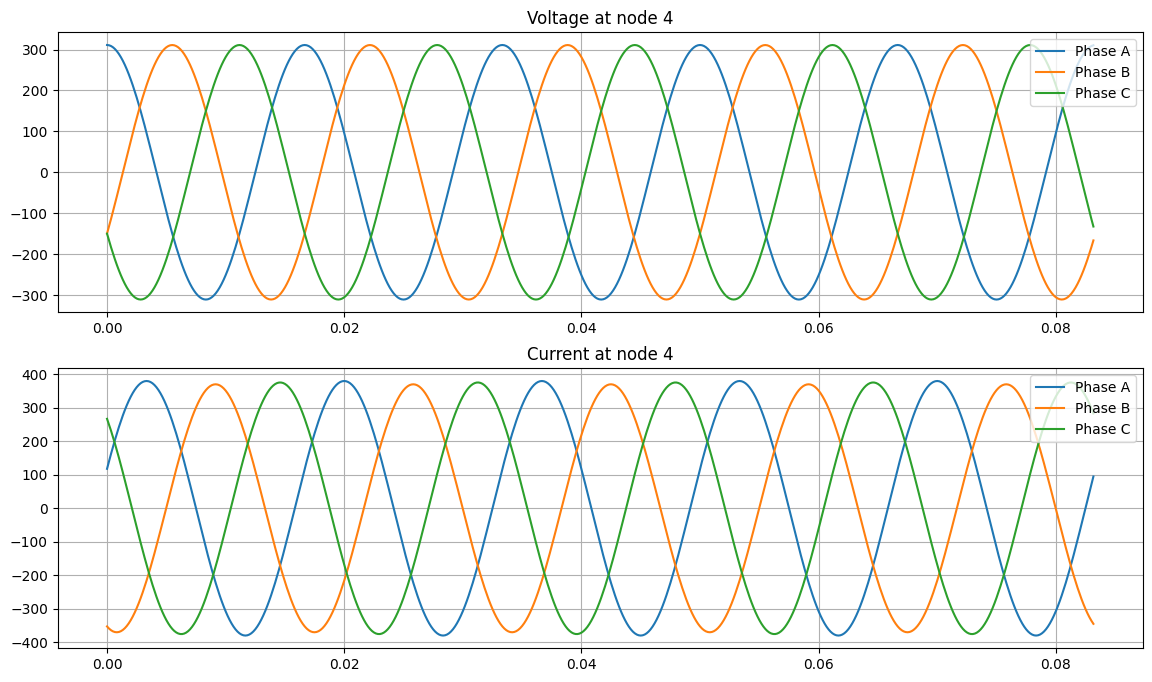

In [ ]:
# Time vector
F = 60
Ts = 1/(100*F)
t = np.arange(0.0, 5 / 60, Ts)

# Sinusoidal voltage function
V4_at = np.abs(V4fasor_a) * np.cos(2 * np.pi * 60 * t + np.angle(V4fasor_a))
V4_bt = np.abs(V4fasor_b) * np.cos(2 * np.pi * 60 * t + np.angle(V4fasor_b))
V4_ct = np.abs(V4fasor_c) * np.cos(2 * np.pi * 60 * t + np.angle(V4fasor_c))
# Sinusoidal current function
I4_at = np.abs(I4fasor_a) * np.cos(2 * np.pi * 60 * t + np.angle(I4fasor_a))
I4_bt = np.abs(I4fasor_b) * np.cos(2 * np.pi * 60 * t + np.angle(I4fasor_b))
I4_ct = np.abs(I4fasor_c) * np.cos(2 * np.pi * 60 * t + np.angle(I4fasor_c))

# Graphing voltage and current in time domain at node 4
fig8, ax8 = plt.subplots(2, 1, figsize=(14, 8))
# Voltage per phase at node 4
ax8[0].plot(t, V4_at)
ax8[0].plot(t, V4_bt)
ax8[0].plot(t, V4_ct)
ax8[0].legend(["Phase A", "Phase B", "Phase C"], loc='upper right')
ax8[0].set_title("Voltage at node 4")
ax8[0].grid()
# Current per phase at node 4
ax8[1].plot(t, I4_at)
ax8[1].plot(t, I4_bt)
ax8[1].plot(t, I4_ct)
ax8[1].legend(["Phase A", "Phase B", "Phase C"], loc='upper right')
ax8[1].set_title("Current at node 4")
ax8[1].grid()
plt.show()

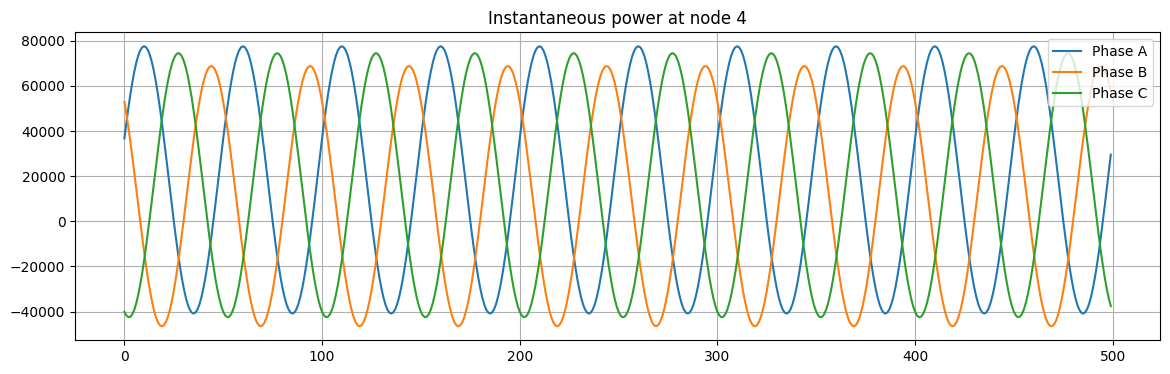

In [ ]:
# Calculation of instantaneous power
P_ph4_a = V4_at * I4_at
P_ph4_b = V4_bt * I4_bt
P_ph4_c = V4_ct * I4_ct

# Graphing voltage and current in time domain at node 4
fig8, ax9 = plt.subplots(1, 1, figsize=(14, 4))
# Voltage per phase at node 4
ax9.plot(P_ph4_a.T)
ax9.plot(P_ph4_b.T)
ax9.plot(P_ph4_c.T)
ax9.legend(["Phase A", "Phase B", "Phase C"], loc='upper right')
ax9.set_title("Instantaneous power at node 4")
ax9.grid()
plt.show()